# Project 4: Ridge Regression

In this project, please review L2 regularization first. We will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression to run polynomial regression with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from Redfin. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Revisiting Polynomial Regression

Copy and paste the function polynomial_df from Project 3

In [3]:
def polynomial_df(feature, degree):
    # assume that degree >= 1
    # initialize the dataframe:
    poly_df = pd.DataFrame()
    # and set poly_df['power_1'] equal to the passed feature
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for i in range(2,degree+1):
            # first we'll give the column a name:
            column_name = 'power_'+str(i)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_df[column_name] = poly_df['power_1'] ** i
    return poly_df

In [4]:
def coef(coefficients,intercept,input_features):
    for x in range(len(input_features)):
        print('The coefficient for {} is {}'.format(input_features[x],coefficients[x]))
    print('The intercept is {}'.format(intercept))

load the data, sort it as we did in Project 3. 

In [5]:
df = pd.read_csv('merged.csv')
df1 = df[['SQUARE FEET','PRICE']]
df2 = df1.dropna()
df3 = df2.sort_values(['SQUARE FEET','PRICE'])
df4 = df3.drop(df3['SQUARE FEET'].idxmax())

Let us revisit the 15th-order polynomial model using the 'SQUARE FEET' input. Generate polynomial features up to degree 15 using polynomial_df() and fit a ridge regression model with these features. When fitting the model, use a very small L2 penalty of 1e-5.

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (alpha=1e-5) to make the solution numerically stable. (Regularization can also help with numerical stability, and here we are seeing a practical example.)
With the L2 penalty specified above, fit the model and print out the learned weights.

Note: if you want to compare results with that in Project 3, you have to scale feature "SQAURE FEET" then you will see the results converge when you set L2 penalty to a very small value close to zero. Please help compare the results when you scale or not scale the feature vs. use normalize =True or not in the Ridge Regression function. Which one makes most senst?

In [6]:
poly15_data = polynomial_df(df4['SQUARE FEET'], 15)
my_features = list(poly15_data.columns.values)
poly15_data['PRICE'] = df4['PRICE']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = poly15_data['PRICE']
X = poly15_data.drop(columns='PRICE')

In [9]:
alpha=1e-5

In [10]:
# First, try run ridge regression without normalization

In [13]:
from sklearn.linear_model import Ridge

In [14]:
regressor = Ridge(alpha,normalize=False)

In [15]:
model_1 = regressor.fit(X,y)

In [16]:
coef(model_1.coef_,model_1.intercept_,my_features)

The coefficient for power_1 is 4033696.451795556
The coefficient for power_2 is -7.63993967090728e-38
The coefficient for power_3 is -3.9487219419085744e-33
The coefficient for power_4 is -3.3150251474382005e-27
The coefficient for power_5 is 3.1733406495065395e-22
The coefficient for power_6 is 1.249228747637475e-22
The coefficient for power_7 is -8.506585446873584e-17
The coefficient for power_8 is 6.650044569547066e-20
The coefficient for power_9 is -1.9045912169208906e-23
The coefficient for power_10 is 2.8182908646783557e-27
The coefficient for power_11 is -2.464391864702022e-31
The coefficient for power_12 is 1.3005912487465223e-35
The coefficient for power_13 is -3.7908452554752985e-40
The coefficient for power_14 is 4.435435529044411e-45
The coefficient for power_15 is 8.378624482670369e-51
The intercept is -7204769047.910833


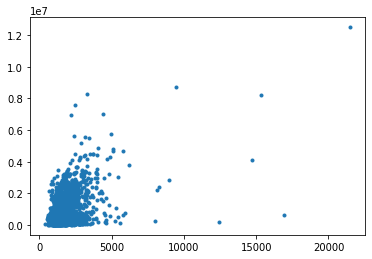

In [17]:
plt.plot(poly15_data['power_1'],poly15_data['PRICE'],'.')

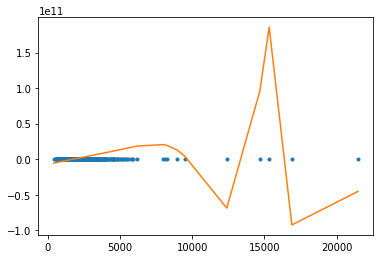

In [18]:
plt.plot(poly15_data['power_1'],poly15_data['PRICE'],'.')
plt.plot(poly15_data['power_1'], model_1.predict(poly15_data[my_features]),'-')

In [19]:
def get_residual_sum_of_squares(model, data, outcome):
    predictions = model.predict(data)
    residuals = predictions - outcome
    residuals_sum = residuals.sum()
    RSS = residuals_sum ** 2
    return(RSS)  

In [20]:
get_residual_sum_of_squares(model_1, X, y)

1249.3532469272614

In [21]:
# Based on the plots, I found that the data points all showed in a line. And the model 
# cannot well explain this model. And also, in the plot, I noticed that, according to the
# model, there might be some negative prices shown in this picture. This was abnormal.

In [22]:
# Then, try to run the ridge regression with normlization.

In [23]:
regressor2 = Ridge(alpha,normalize=True)

In [24]:
model_2 = regressor2.fit(X,y)

In [25]:
coef(model_2.coef_,model_1.intercept_,my_features)

The coefficient for power_1 is 226.64813710012555
The coefficient for power_2 is 0.10084657999569206
The coefficient for power_3 is -1.3504175700354324e-05
The coefficient for power_4 is -4.837630882731061e-11
The coefficient for power_5 is 2.816010194504019e-14
The coefficient for power_6 is 1.4667739710107455e-18
The coefficient for power_7 is 2.860631496977552e-23
The coefficient for power_8 is -1.2066678974669707e-27
The coefficient for power_9 is -1.5022367009429452e-31
The coefficient for power_10 is -8.888494668617306e-36
The coefficient for power_11 is -3.726348019465922e-40
The coefficient for power_12 is -1.0176151982481311e-44
The coefficient for power_13 is 4.0257123396264956e-50
The coefficient for power_14 is 3.09793849107995e-53
The coefficient for power_15 is 2.9072644041687164e-57
The intercept is -7204769047.910833


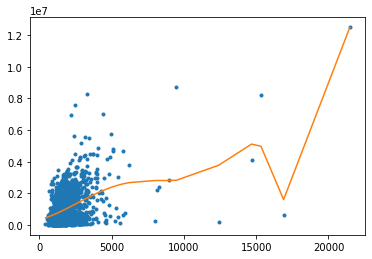

In [26]:
plt.plot(poly15_data['power_1'],poly15_data['PRICE'],'.')
plt.plot(poly15_data['power_1'], model_2.predict(poly15_data[my_features]),'-')

In [27]:
get_residual_sum_of_squares(model_2, X, y)

9.217973606645558e-14

In [28]:
# I think this model is better than the previous. I found that more data can be explained
# by the model. And all the prices predicted by this model are all above 0. 

# Observe overfitting

Recall from Project 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Project 3 with very small L2 penalty.

First, split the data into split the sales data into four subsets of roughly equal size and call them set_1, set_2, set_3, and set_4.

In [29]:
data1,data2 = train_test_split(df4,test_size = 0.5)

In [30]:
set_1, set_2 = train_test_split(data1,test_size = 0.5)

In [31]:
set_3, set_4 = train_test_split(data2,test_size = 0.5)

In [32]:
set_1 = set_1.sort_values(['SQUARE FEET','PRICE'])
set_2 = set_2.sort_values(['SQUARE FEET','PRICE'])
set_3 = set_3.sort_values(['SQUARE FEET','PRICE'])
set_4 = set_4.sort_values(['SQUARE FEET','PRICE'])

Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using scaled 'SQUARE FEET' to predict prices. Print the weights and make a plot of the resulting model.
Hint: use the same L2 penalty as before (i.e. 1e-5)

The four curves should differ from one another a lot, as should the coefficients you learned.

There is obvious overfitting here--as the model does not generalize for each sets of data. You can expect poor performance from the test data set too. We have a high variance problem here with our model.


In [33]:
# For set 1

In [34]:
set_1_data = polynomial_df(set_1['SQUARE FEET'], 15)
my_features_1 = list(set_1_data.columns.values)
set_1_data['PRICE'] = set_1['PRICE']

In [35]:
regressor = Ridge(alpha,normalize=True)
model_set_1 = regressor.fit(set_1_data.drop(columns='PRICE'),set_1_data['PRICE'])
coef(model_set_1.coef_,model_set_1.intercept_,my_features_1)

The coefficient for power_1 is 100.7307680252531
The coefficient for power_2 is 0.158410250493415
The coefficient for power_3 is -2.5559507021746413e-05
The coefficient for power_4 is -8.013215114156226e-11
The coefficient for power_5 is 6.92603891903249e-14
The coefficient for power_6 is 4.161191604214671e-18
The coefficient for power_7 is 1.0155750569920633e-22
The coefficient for power_8 is -4.0277294844339754e-27
The coefficient for power_9 is -6.81202374998568e-31
The coefficient for power_10 is -5.232560568141079e-35
The coefficient for power_11 is -2.916072265617812e-39
The coefficient for power_12 is -1.1142944604250769e-43
The coefficient for power_13 is -1.5838635786767659e-49
The coefficient for power_14 is 5.327298022597683e-52
The coefficient for power_15 is 7.318190631975184e-56
The intercept is 480321.1804835844


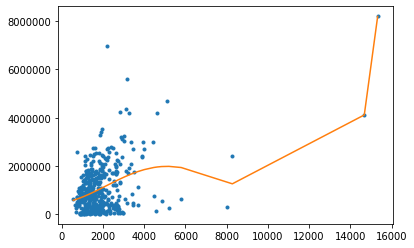

In [36]:
plt.plot(set_1_data['power_1'],set_1_data['PRICE'],'.')
plt.plot(set_1_data['power_1'], model_set_1.predict(set_1_data[my_features]),'-')

In [37]:
# For set 2

In [38]:
set_2_data = polynomial_df(set_2['SQUARE FEET'], 15)
my_features_2 = list(set_2_data.columns.values)
set_2_data['PRICE'] = set_2['PRICE']

In [39]:
regressor = Ridge(alpha,normalize=True)
model_set_2 = regressor.fit(set_2_data.drop(columns='PRICE'),set_2_data['PRICE'])
coef(model_set_2.coef_,model_set_2.intercept_,my_features_2)

The coefficient for power_1 is 525.4057550670867
The coefficient for power_2 is -0.05626484543105909
The coefficient for power_3 is 8.277568690666545e-06
The coefficient for power_4 is -2.018230982475193e-10
The coefficient for power_5 is -2.4771025326831068e-14
The coefficient for power_6 is -1.1077106961242095e-18
The coefficient for power_7 is -3.3168442619092843e-23
The coefficient for power_8 is -4.848255144701044e-28
The coefficient for power_9 is 2.692287908798577e-32
The coefficient for power_10 is 3.5165877450490776e-36
The coefficient for power_11 is 2.718486764129361e-40
The coefficient for power_12 is 1.8152122425414542e-44
The coefficient for power_13 is 1.1402456188008642e-48
The coefficient for power_14 is 6.957636120830625e-53
The coefficient for power_15 is 4.1839683421355396e-57
The intercept is 159349.9912114069


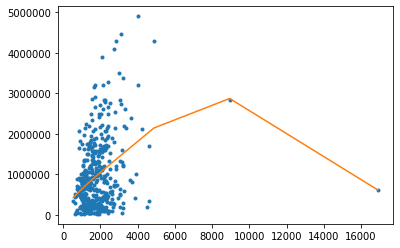

In [40]:
plt.plot(set_2_data['power_1'],set_2_data['PRICE'],'.')
plt.plot(set_2_data['power_1'], model_set_2.predict(set_2_data[my_features]),'-')

In [41]:
# For set 3

In [42]:
set_3_data = polynomial_df(set_3['SQUARE FEET'], 15)
my_features_3 = list(set_3_data.columns.values)
set_3_data['PRICE'] = set_3['PRICE']

In [43]:
regressor = Ridge(alpha,normalize=True)
model_set_3 = regressor.fit(set_3_data.drop(columns='PRICE'),set_3_data['PRICE'])
coef(model_set_3.coef_,model_set_3.intercept_,my_features_3)

The coefficient for power_1 is 215.9716518898236
The coefficient for power_2 is 0.08032715006381394
The coefficient for power_3 is -3.4213284929838705e-06
The coefficient for power_4 is 1.1506636027237808e-10
The coefficient for power_5 is 9.170122059540741e-15
The coefficient for power_6 is 2.877892376383014e-19
The coefficient for power_7 is 5.021808075829179e-24
The coefficient for power_8 is -4.144525593467663e-29
The coefficient for power_9 is -9.268793847577903e-33
The coefficient for power_10 is -6.078846691647647e-37
The coefficient for power_11 is -3.229713868642488e-41
The coefficient for power_12 is -1.5910895492345972e-45
The coefficient for power_13 is -7.595061837794277e-50
The coefficient for power_14 is -3.575803717612021e-54
The coefficient for power_15 is -1.673222961296021e-58
The intercept is 406587.6662942646


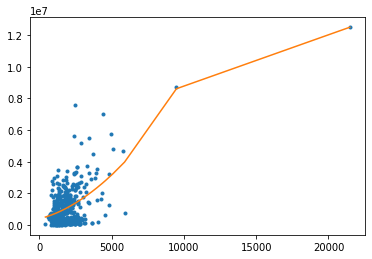

In [44]:
plt.plot(set_3_data['power_1'],set_3_data['PRICE'],'.')
plt.plot(set_3_data['power_1'], model_set_3.predict(set_3_data[my_features]),'-')

In [45]:
# For set 4

In [46]:
set_4_data = polynomial_df(set_4['SQUARE FEET'], 15)
my_features_4 = list(set_4_data.columns.values)
set_4_data['PRICE'] = set_4['PRICE']

In [47]:
regressor = Ridge(alpha,normalize=True)
model_set_4 = regressor.fit(set_4_data.drop(columns='PRICE'),set_4_data['PRICE'])
coef(model_set_4.coef_,model_set_4.intercept_,my_features_4)

The coefficient for power_1 is 66.44499130868533
The coefficient for power_2 is 0.2539150610554252
The coefficient for power_3 is -4.4528890111600534e-05
The coefficient for power_4 is -1.6118139725122148e-10
The coefficient for power_5 is 1.7055216268143354e-13
The coefficient for power_6 is 1.2054158587543837e-17
The coefficient for power_7 is 3.640034706499057e-22
The coefficient for power_8 is -1.1555017504414808e-26
The coefficient for power_9 is -2.5593708003554017e-30
The coefficient for power_10 is -2.2558915211407946e-34
The coefficient for power_11 is -1.4510251042612642e-38
The coefficient for power_12 is -7.0410127769875265e-43
The coefficient for power_13 is -1.7986286997339448e-47
The coefficient for power_14 is 1.2937056873706511e-51
The coefficient for power_15 is 2.8195466777426046e-55
The intercept is 312809.6994990787


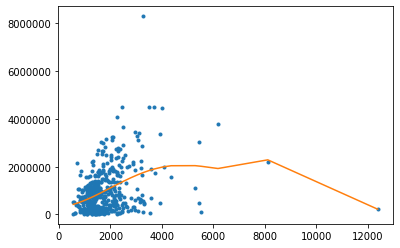

In [48]:
plt.plot(set_4_data['power_1'],set_4_data['PRICE'],'.')
plt.plot(set_4_data['power_1'], model_set_4.predict(set_4_data[my_features]),'-')

# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights.
With the argument l2_penalty=1e5, fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4. Other than the change in the l2_penalty parameter, the code should be the same as the experiment above. 

In [49]:
# For Set 1

In [50]:
regressor = Ridge(alpha=1e5,normalize=True)
model_set_1 = regressor.fit(set_1_data.drop(columns='PRICE'),set_1_data['PRICE'])
coef(model_set_1.coef_,model_set_1.intercept_,my_features_1)

The coefficient for power_1 is 0.0034533027865116185
The coefficient for power_2 is 2.513675394902545e-07
The coefficient for power_3 is 1.606032900716611e-11
The coefficient for power_4 is 1.050905235488272e-15
The coefficient for power_5 is 6.969420439137078e-20
The coefficient for power_6 is 4.637018941644477e-24
The coefficient for power_7 is 3.085586680643395e-28
The coefficient for power_8 is 2.0516493843462083e-32
The coefficient for power_9 is 1.362733470820268e-36
The coefficient for power_10 is 9.041075237171598e-41
The coefficient for power_11 is 5.991309110644538e-45
The coefficient for power_12 is 3.965719387303824e-49
The coefficient for power_13 is 2.622013363256734e-53
The coefficient for power_14 is 1.7317252100470772e-57
The coefficient for power_15 is 1.1425500278705972e-61
The intercept is 1039807.2432719222


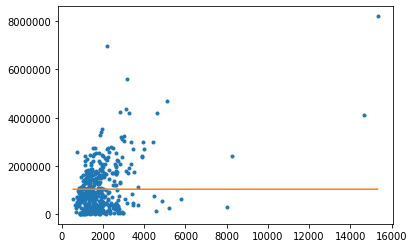

In [51]:
plt.plot(set_1_data['power_1'],set_1_data['PRICE'],'.')
plt.plot(set_1_data['power_1'], model_set_1.predict(set_1_data[my_features]),'-')

In [52]:
# For set 2

In [53]:
regressor = Ridge(alpha=1e5,normalize=True)
model_set_2 = regressor.fit(set_2_data.drop(columns='PRICE'),set_2_data['PRICE'])
coef(model_set_2.coef_,model_set_2.intercept_,my_features_2)

The coefficient for power_1 is 0.0019945358637848453
The coefficient for power_2 is 5.184421539011174e-08
The coefficient for power_3 is 5.524614906039411e-13
The coefficient for power_4 is -1.3379605045708639e-17
The coefficient for power_5 is -1.704369009949569e-21
The coefficient for power_6 is -1.2239460012650334e-25
The coefficient for power_7 is -7.823933435944326e-30
The coefficient for power_8 is -4.79939566957778e-34
The coefficient for power_9 is -2.8916275062938e-38
The coefficient for power_10 is -1.7272003490582194e-42
The coefficient for power_11 is -1.0271824132062843e-46
The coefficient for power_12 is -6.09498774397873e-51
The coefficient for power_13 is -3.61231693611132e-55
The coefficient for power_14 is -2.1395842488413166e-59
The coefficient for power_15 is -1.2668662141906763e-63
The intercept is 948342.7482810235


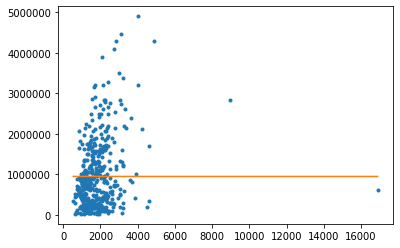

In [54]:
plt.plot(set_2_data['power_1'],set_2_data['PRICE'],'.')
plt.plot(set_2_data['power_1'], model_set_2.predict(set_2_data[my_features]),'-')

In [55]:
# For set 3

In [56]:
regressor = Ridge(alpha=1e5,normalize=True)
model_set_3 = regressor.fit(set_3_data.drop(columns='PRICE'),set_3_data['PRICE'])
coef(model_set_3.coef_,model_set_3.intercept_,my_features_3)

The coefficient for power_1 is 0.006012926562075296
The coefficient for power_2 is 3.003044015894353e-07
The coefficient for power_3 is 1.2484476980828805e-11
The coefficient for power_4 is 5.536884093633686e-16
The coefficient for power_5 is 2.5314516314682664e-20
The coefficient for power_6 is 1.1702350671019106e-24
The coefficient for power_7 is 5.432693534548384e-29
The coefficient for power_8 is 2.5264168203496862e-33
The coefficient for power_9 is 1.1757373146118343e-37
The coefficient for power_10 is 5.473327948566824e-42
The coefficient for power_11 is 2.5483073216925776e-46
The coefficient for power_12 is 1.186528156861854e-50
The coefficient for power_13 is 5.5247888523076826e-55
The coefficient for power_14 is 2.57251748497336e-59
The coefficient for power_15 is 1.1978520926295144e-63
The intercept is 1102369.5080309238


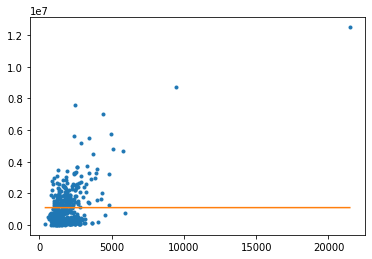

In [57]:
plt.plot(set_3_data['power_1'],set_3_data['PRICE'],'.')
plt.plot(set_3_data['power_1'], model_set_3.predict(set_3_data[my_features]),'-')

In [58]:
# For set 4

In [59]:
regressor = Ridge(alpha=1e5,normalize=True)
model_set_4 = regressor.fit(set_4_data.drop(columns='PRICE'),set_4_data['PRICE'])
coef(model_set_4.coef_,model_set_4.intercept_,my_features_4)

The coefficient for power_1 is 0.002891418195891807
The coefficient for power_2 is 1.6176120581030117e-07
The coefficient for power_3 is 4.0372366244821194e-12
The coefficient for power_4 is -3.4104014608927285e-17
The coefficient for power_5 is -1.468792613645363e-20
The coefficient for power_6 is -1.6068495857225999e-24
The coefficient for power_7 is -1.4615819842100344e-28
The coefficient for power_8 is -1.2498195621075746e-32
The coefficient for power_9 is -1.0405408488013197e-36
The coefficient for power_10 is -8.548535477980274e-41
The coefficient for power_11 is -6.972527516141615e-45
The coefficient for power_12 is -5.6635932012895344e-49
The coefficient for power_13 is -4.589070569836749e-53
The coefficient for power_14 is -3.7128260360356126e-57
The coefficient for power_15 is -3.001086170934739e-61
The intercept is 969472.4060521068


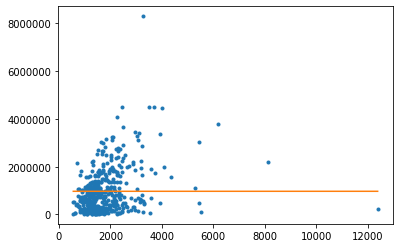

In [60]:
plt.plot(set_4_data['power_1'],set_4_data['PRICE'],'.')
plt.plot(set_4_data['power_1'], model_set_4.predict(set_4_data[my_features]),'-')

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last project, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:
Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.
To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments (use sklearn.utils.shuffle). We reserve 10% of the data as the test set and shuffle the remainder.

In [61]:
train_valid = df4.sample(frac=0.9,random_state=1)
test_data = df4.drop(train_valid.index)
from sklearn.utils import shuffle
train_valid_shuffled = shuffle(train_valid)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [73]:
from sklearn.linear_model import Ridge

In [96]:
def k_fold_cross_validation(k,l2_penalty,dataframe,output_name,features):
    n = len(dataframe)
    validation_error = []
    for i in range(0,k):
        start = int((i*n)/k)
        end = int((n*(i+1)/k)-1)
        validation_set = dataframe[start:end+1]
        training_set = dataframe[0:start].append(dataframe[end+1:n])
        model = Ridge(alpha = l2_penalty,normalize=True)
        model_1 = model.fit(training_set[features], training_set[output_name])
        
    prediction = model_1.predict(validation_set[features])
    square_error = (prediction - validation_set[output_name]) * (prediction - validation_set[output_name])
    sum_square_error = square_error.sum()
    
    validation_error.append(sum_square_error)
    
    #avg_validation_error = validation_error / len(validation_error)
    
    return sum(validation_error)/len(validation_error)
        
    

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `SQUARE FEET` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [75]:
data_new = polynomial_df(train_valid_shuffled['SQUARE FEET'],15)
my_features_new = list(data_new.columns.values)
data_new['PRICE'] = train_valid_shuffled['PRICE']

In [77]:
l2_penalty_values = np.logspace(1,7,num=13)

In [100]:
errors = []
min_error = None
best_l2 = None
for l2_penalty in l2_penalty_values:
    avg_error = k_fold_cross_validation(10,l2_penalty,data_new,'PRICE',my_features_new)
    errors.append(avg_error)
    if (min_error is None) or (avg_error < min_error):
        min_error = avg_error
        best_l2 = l2_penalty
print(best_l2_penalty,min_error)

10.0 162025546063788.75


What is the best value for the L2 penalty according to 10-fold validation? You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.

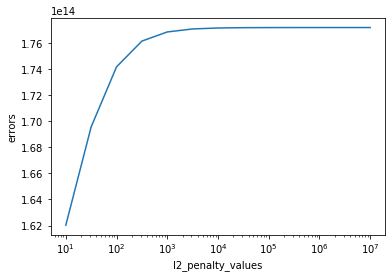

In [106]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
plt.plot(l2_penalty_values,errors)
plt.xlabel('l2_penalty_values')
plt.ylabel('errors')
plt.xscale('log')

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [109]:
new_data2 = polynomial_df(df4['SQUARE FEET'],15)
my_features_new2 = list(new_data2.columns.values)
new_data2['PRICE'] = df4['PRICE']

In [112]:
model_new = Ridge(alpha = best_l2,normalize=True)
model_new_2 = model_new.fit(new_data2[my_features_new2],new_data2['PRICE'])

In [113]:
coef(model_new_2.coef_,model_new_2.intercept_,my_features_new2)

The coefficient for power_1 is 27.834609648824472
The coefficient for power_2 is 0.0012919905868476146
The coefficient for power_3 is 5.006425900236028e-08
The coefficient for power_4 is 2.1923091124508024e-12
The coefficient for power_5 is 1.0054051377757595e-16
The coefficient for power_6 is 4.646973215446285e-21
The coefficient for power_7 is 2.149211097159059e-25
The coefficient for power_8 is 9.945775994231777e-30
The coefficient for power_9 is 4.607839401123599e-34
The coefficient for power_10 is 2.1376685009493842e-38
The coefficient for power_11 is 9.929356127306836e-43
The coefficient for power_12 is 4.616742988168432e-47
The coefficient for power_13 is 2.1481824300887513e-51
The coefficient for power_14 is 1.000063895107732e-55
The coefficient for power_15 is 4.657216230215676e-60
The intercept is 953074.3822201411


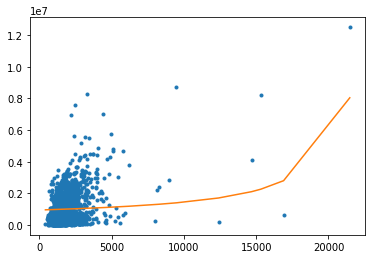

In [115]:
plt.plot(new_data2['power_1'],new_data2['PRICE'],'.')
plt.plot(new_data2['power_1'], model_new_2.predict(new_data2[my_features]),'-')

In [116]:
get_residual_sum_of_squares(model_new_2, new_data2.drop(columns='PRICE'), new_data2['PRICE'])

8.881784197001252e-16

# Implement ridge regression via gradient descent

Now we are going to implement ridge regession via gradient descent. We will:
* Convert dataframe into a numpy array
* Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

first copy and past get_numpy_data() and predict_output() function from the 2nd project.

In [117]:
def get_numpy_data(data, features, output):
    data['Constant'] = 1
    features = ['Constant'] + features
    feature_matrix = data[features].values
    output_array = data[output].values
    return(feature_matrix, output_array)

In [118]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

# Computing the Derivative

We are now going to move to computing the derivative of the regression cost function. The cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.
```
Cost(w)
= SUM[ (prediction - output)^2 ]
+ l2_penalty*(w[0]^2 + w[1]^2 + ... + w[k]^2).
```

Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in Week 2 and add the derivative of the regularization part.  As we saw, the derivative of the RSS with respect to `w[i]` can be written as: 
```
2*SUM[ error*[feature_i] ].
```
The derivative of the regularization term with respect to `w[i]` is:
```
2*l2_penalty*w[i].
```
Summing both, we get
```
2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i].
```
That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus `2*l2_penalty*w[i]`. 

**We will not regularize the constant.**  Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the `2*l2_penalty*w[0]` term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus `2*l2_penalty*w[i]`.

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).  To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call `feature_is_constant` which you should set to `True` when computing the derivative of the constant and `False` otherwise.

In [173]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if (feature_is_constant):
        derivative = 2 * np.dot(errors,feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(errors,feature) + 2*l2_penalty*weight
    return derivative

Let's test the feature derivative function by running the following code:

In [174]:
(example_features, example_output) = get_numpy_data(df4, ['SQUARE FEET'], 'PRICE') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)
print ('')

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)

-8412802539862.0
-8412802539862.0

-3626247728.0
-3626247728.0


# Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of *increase* and therefore the negative gradient is the direction of *decrease* and we're trying to *minimize* a cost function. 

The amount by which we move in the negative gradient *direction*  is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. Unlike in Project 2, this time we will set a **maximum number of iterations** and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.

In [218]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print ('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights)
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    while iteration < max_iterations:
    #while not reached maximum number of iterations:
        # your code  # increment iteration counter
        iteration = iteration + 1
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print ('Cost function = ' ,str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)):
            
            # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if (i==0):
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - (step_size * derivative)
    print ('Done with gradient descent at iteration ', iteration)
    print ('Learned weights = ', str(weights))
    return weights

# Visualizing effect of L2 penalty

The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:

In [131]:
simple_features = ['SQUARE FEET']
my_output = 'PRICE'

Let us split the dataset into training set and test set with 80/20:

In [211]:
from sklearn.model_selection import train_test_split
training_set,test_set = train_test_split(df4,test_size=0.2)

In this part, we will only use 'SQUARE FEET' to predict 'PRICE'. Use the get_numpy_data function to get a Numpy versions of your data with only this feature, for both the train_data and the test_data.

In [212]:
(training_feature,training_output) = get_numpy_data(training_set, simple_features, my_output)
(testing_feature,testing_output) = get_numpy_data(test_set, simple_features, my_output)

/Users/liziwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's set the parameters for our optimization:

In [213]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

First, let's consider no regularization. Set the l2_penalty to 0.0 and run your ridge regression algorithm to learn the weights of your model. Call your weights:
simple_weights_0_penalty
we'll use them later.

In [222]:
simple_weights_0_penalty = ridge_regression_gradient_descent(training_feature, training_output, initial_weights, step_size, 0.0, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  2973632282966886.0
Iteration = 2
Cost function =  2927152390679965.5
Iteration = 3
Cost function =  2881939560763116.5
Iteration = 4
Cost function =  2837959252537070.5
Iteration = 5
Cost function =  2795177866916710.0
Iteration = 6
Cost function =  2753562720742808.0
Iteration = 7
Cost function =  2713082021813476.5
Iteration = 8
Cost function =  2673704844596275.5
Iteration = 9
Cost function =  2635401106602433.5
Iteration = 10
Cost function =  2598141545405085.5
Iteration = 20
Cost function =  2277081286780931.5
Iteration = 30
Cost function =  2033551364568262.5
Iteration = 40
Cost function =  1848829582806548.0
Iteration = 50
Cost function =  1708714822545997.8
Iteration = 60
Cost function =  1602435282238792.8
Iteration = 70
Cost function =  1521820358639100.8
Iteration = 80
Cost function =  1460672503722628.2
Iteration = 90
Cost function =  1414290766977179.0
Iteration = 100
Cost function =  1379109393

Next, let's consider high regularization. Set the l2_penalty to 3.e9 and run your ridge regression algorithm to learn the weights of your model. Call your weights:
simple_weights_high_penalty
we'll use them later.

In [223]:
simple_weights_high_penalty = ridge_regression_gradient_descent(training_feature, training_output, initial_weights, step_size, 3e9, max_iterations)

Starting gradient descent with l2_penalty = 3000000000.0
Iteration = 1
Cost function =  2973632282966886.0
Iteration = 2
Cost function =  2927292793805728.5
Iteration = 3
Cost function =  2882763313331189.5
Iteration = 4
Cost function =  2839973143061557.5
Iteration = 5
Cost function =  2798854345979946.0
Iteration = 6
Cost function =  2759341638672169.0
Iteration = 7
Cost function =  2721372287677698.5
Iteration = 8
Cost function =  2684886009889111.5
Iteration = 9
Cost function =  2649824876841924.0
Iteration = 10
Cost function =  2616133222742828.5
Iteration = 20
Cost function =  2343742343008081.5
Iteration = 30
Cost function =  2160866462369990.8
Iteration = 40
Cost function =  2038088533498040.0
Iteration = 50
Cost function =  1955658745640820.2
Iteration = 60
Cost function =  1900317609484733.2
Iteration = 70
Cost function =  1863163062165973.0
Iteration = 80
Cost function =  1838218499204762.0
Iteration = 90
Cost function =  1821471389836697.8
Iteration = 100
Cost function =  1

Use the code below to plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

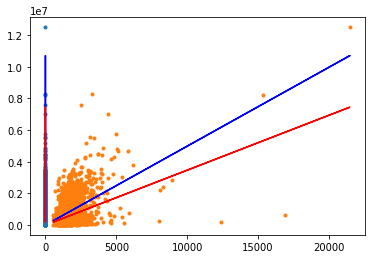

In [231]:
plt.plot(training_feature,training_output,'.')
plt.plot(training_feature,predict_output(training_feature, simple_weights_0_penalty) ,'-',color='blue')
plt.plot(training_feature,predict_output(training_feature, simple_weights_high_penalty) ,'-',color='red')

Compute the RSS on the TEST data for the following three sets of weights:
The initial weights (all zeros)
The weights learned with no regularization
The weights learned with high regularization
Which weights perform best?

In [232]:
predictions_1 = predict_output(testing_feature, initial_weights)
errors_square_1 = (predictions_1 - testing_output) ** 2
RSS_1 = errors_square_1.sum()
print('RSS for test data on initial weights is:',RSS_1)

RSS for test data on initial weights is: 798125082165935.0


In [240]:
predictions_2 = predict_output(testing_feature, simple_weights_0_penalty)
errors_square_2 = (predictions_2 - testing_output) ** 2
RSS_2 = errors_square_2.sum()
print('RSS for test data on weights learned with no regularization is:',RSS_2)

RSS for test data on weights learned with no regularization is: 326216002380153.94


In [241]:
predictions_3 = predict_output(testing_feature, simple_weights_high_penalty)
errors_square_3 = (predictions_3 - testing_output) ** 2
RSS_3 = errors_square_3.sum()
print('RSS for test data on weights learned with high regularization is:',RSS_3)

RSS for test data on weights learned with high regularization is: 385989709634229.94


why do you think the RSS for test sets are in this way?

In [ ]:
# I find that Rss for the test data on weights learned with no regularization is
# smaller than the learned with regularization one.

# Running a multiple regression with L2 penalty

Now do some research on a model with multiple features. For example, you can explore "SQUARE FEET" and number of bedrooms and bathrooms. Remember to re-initialize your weights since now you have multiple parameters. First consider no regularization and then run it with regularization. 

Compute the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization

Which weights perform best?

In [248]:
multiple_features = ['SQUARE FEET','BEDS','BATHS']
output = 'PRICE'

In [259]:
data = df[['SQUARE FEET','BEDS','BATHS','PRICE']]

In [261]:
data2 = data.dropna()

In [262]:
(multi_train,multi_test) = train_test_split(data2,test_size=0.2)

In [274]:
(multi_train_feature,multi_train_output) = get_numpy_data(multi_train, multiple_features, output)

/Users/liziwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [281]:
(multi_test_feature,multi_test_output) = get_numpy_data(multi_test, multiple_features, output)

/Users/liziwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [276]:
initial_weights = np.array([0., 0.,0.,0.])
step_size = 1e-12
max_iterations=1000

In [278]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(mutlti_test_feature, multi_test_output, initial_weights, step_size, 0.0, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  592375251526563.0
Iteration = 2
Cost function =  590484801765438.2
Iteration = 3
Cost function =  588604194298071.6
Iteration = 4
Cost function =  586733377882294.0
Iteration = 5
Cost function =  584872301542719.5
Iteration = 6
Cost function =  583020914569356.0
Iteration = 7
Cost function =  581179166516225.0
Iteration = 8
Cost function =  579347007199985.2
Iteration = 9
Cost function =  577524386698566.5
Iteration = 10
Cost function =  575711255349809.5
Iteration = 20
Cost function =  558091102731436.56
Iteration = 30
Cost function =  541367115635020.0
Iteration = 40
Cost function =  525493714850001.8
Iteration = 50
Cost function =  510427639336278.0
Iteration = 60
Cost function =  496127828321449.4
Iteration = 70
Cost function =  482555309394635.75
Iteration = 80
Cost function =  469673092291868.25
Iteration = 90
Cost function =  457446068083584.25
Iteration = 100
Cost function =  445840913489472.3
Iterat

In [279]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(mutlti_test_feature, multi_test_output, initial_weights, step_size, 3e9, max_iterations)

Starting gradient descent with l2_penalty = 3000000000.0
Iteration = 1
Cost function =  592375251526563.0
Iteration = 2
Cost function =  590490480514287.5
Iteration = 3
Cost function =  588638012671858.1
Iteration = 4
Cost function =  586817294353813.4
Iteration = 5
Cost function =  585027781403645.2
Iteration = 6
Cost function =  583268938991168.6
Iteration = 7
Cost function =  581540241452676.4
Iteration = 8
Cost function =  579841172133835.2
Iteration = 9
Cost function =  578171223235273.5
Iteration = 10
Cost function =  576529895660815.4
Iteration = 20
Cost function =  561586923270247.3
Iteration = 30
Cost function =  549016270307087.75
Iteration = 40
Cost function =  538441311543064.25
Iteration = 50
Cost function =  529545214103733.5
Iteration = 60
Cost function =  522061444940343.25
Iteration = 70
Cost function =  515765785318640.1
Iteration = 80
Cost function =  510469613073283.06
Iteration = 90
Cost function =  506014251359643.25
Iteration = 100
Cost function =  50226621458775

In [282]:
predictions_multi_1 = predict_output(multi_test_feature, initial_weights)
errors_square_multi_1 = (predictions_multi_1 - multi_test_output) ** 2
RSS_multi_1 = errors_square_multi_1.sum()
print('RSS for test data on initial weights is:',RSS_multi_1)

RSS for test data on initial weights is: 592375251526563.0


In [285]:
predictions_multi_2 = predict_output(multi_test_feature, multiple_weights_0_penalty)
errors_square_multi_2 = (predictions_multi_2 - multi_test_output) ** 2
RSS_multi_2 = errors_square_multi_2.sum()
print('RSS for test data on weights learned with no regularization is:',RSS_multi_2)

RSS for test data on weights learned with no regularization is: 231232386746841.5


In [286]:
predictions_multi_3 = predict_output(multi_test_feature, multiple_weights_high_penalty)
errors_square_multi_3 = (predictions_multi_3 - multi_test_output) ** 2
RSS_multi_3 = errors_square_multi_3.sum()
print('RSS for test data on weights learned with high regularization is:',RSS_multi_3)

RSS for test data on weights learned with high regularization is: 405768291777737.9
